# Association Rules, Apriori Algo

Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,
   confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

Use Data set: my_movies.csv

# Import libraries 

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend

In [5]:
! pip install mlxtend

In [21]:
my_movies = pd.read_csv("my_movies.csv")
my_movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [22]:
df=pd.get_dummies(Book)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# Apriori Algorithm for Support =0.1  
1. Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

In [4]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5..."
1393,0.1,"(V2_LOTR1, V3_Harry Potter1, V5_LOTR2, LOTR2, ..."
1394,0.1,"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5..."
1395,0.1,"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5..."


In [5]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
64247,(Sixth Sense),"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64248,(V1_Sixth Sense),"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(Green Mile),"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(LOTR1),"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [6]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Green Mile, Harry Potter1, LOTR2, Sixth Sense)","(V5_LOTR2, LOTR1, V3_Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33436,"(V2_LOTR1, LOTR1, Sixth Sense)","(V5_LOTR2, Harry Potter1, LOTR2, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33414,"(V2_LOTR1, Harry Potter1, Sixth Sense)","(V5_LOTR2, LOTR1, LOTR2, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(Harry Potter1, LOTR1, Sixth Sense)","(V5_LOTR2, V2_LOTR1, LOTR2, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(Harry Potter1, V4_Green Mile, Sixth Sense)","(V5_LOTR2, V2_LOTR1, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(V2_LOTR1, Harry Potter1, LOTR1)","(V5_LOTR2, V4_Green Mile, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(V2_LOTR1, Harry Potter1, V4_Green Mile)","(V5_LOTR2, LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(Harry Potter1, LOTR1, V4_Green Mile)","(V5_LOTR2, V2_LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(V5_LOTR2, LOTR2, Sixth Sense)","(V2_LOTR1, Harry Potter1, LOTR1, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(V5_LOTR2, V2_LOTR1, LOTR2)","(V4_Green Mile, Harry Potter1, LOTR1, Sixth Se...",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [7]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64247,(Sixth Sense),"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64248,(V1_Sixth Sense),"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(Green Mile),"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(LOTR1),"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


# Apriori Algorithm for Support =0.15

In [8]:
frequent_itemsets = apriori(df, min_support=0.15, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(V3_Sixth Sense, Patriot, Sixth Sense, V2_Patr..."
77,0.4,"(V2_Patriot, V3_Sixth Sense, Sixth Sense, V1_G..."
78,0.4,"(V2_Patriot, V3_Sixth Sense, Patriot, Sixth Se..."
79,0.4,"(V2_Patriot, V3_Sixth Sense, Patriot, V1_Gladi..."


In [9]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
649,(V3_Sixth Sense),"(V1_Gladiator, Patriot, Sixth Sense, V2_Patrio...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
650,(Patriot),"(V1_Gladiator, V3_Sixth Sense, Sixth Sense, V2...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(Sixth Sense),"(V1_Gladiator, V3_Sixth Sense, Patriot, V2_Pat...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(V1_Gladiator),"(V3_Sixth Sense, Patriot, Sixth Sense, V2_Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [10]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
114,(V1_Sixth Sense),"(Sixth Sense, V4_Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
41,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
176,"(Green Mile, V1_Sixth Sense)",(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
322,"(Green Mile, Sixth Sense)","(V1_Sixth Sense, V4_Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
32,(Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
33,(V1_Sixth Sense),(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
34,(Green Mile),(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
35,(V4_Green Mile),(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
321,"(Green Mile, V1_Sixth Sense)","(Sixth Sense, V4_Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
320,"(Sixth Sense, V4_Green Mile)","(Green Mile, V1_Sixth Sense)",0.2,0.2,0.2,1.0,5.0,0.16,inf


In [11]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
649,(V3_Sixth Sense),"(V1_Gladiator, Patriot, Sixth Sense, V2_Patrio...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
650,(Patriot),"(V1_Gladiator, V3_Sixth Sense, Sixth Sense, V2...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(Sixth Sense),"(V1_Gladiator, V3_Sixth Sense, Patriot, V2_Pat...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(V1_Gladiator),"(V3_Sixth Sense, Patriot, Sixth Sense, V2_Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


# Apriori Algorithm for Support =0.17

In [12]:
frequent_itemsets = apriori(df, min_support=0.17, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(V3_Sixth Sense, Patriot, Sixth Sense, V2_Patr..."
77,0.4,"(V2_Patriot, V3_Sixth Sense, Sixth Sense, V1_G..."
78,0.4,"(V2_Patriot, V3_Sixth Sense, Patriot, Sixth Se..."
79,0.4,"(V2_Patriot, V3_Sixth Sense, Patriot, V1_Gladi..."


In [42]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(DoItYBks),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770
3,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
4,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
5,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
7,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875
8,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361
9,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766


In [13]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
114,(V1_Sixth Sense),"(Sixth Sense, V4_Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
41,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
176,"(Green Mile, V1_Sixth Sense)",(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
322,"(Green Mile, Sixth Sense)","(V1_Sixth Sense, V4_Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
32,(Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
33,(V1_Sixth Sense),(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
34,(Green Mile),(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
35,(V4_Green Mile),(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
321,"(Green Mile, V1_Sixth Sense)","(Sixth Sense, V4_Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
320,"(Sixth Sense, V4_Green Mile)","(Green Mile, V1_Sixth Sense)",0.2,0.2,0.2,1.0,5.0,0.16,inf


In [14]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
649,(V3_Sixth Sense),"(V1_Gladiator, Patriot, Sixth Sense, V2_Patrio...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
650,(Patriot),"(V1_Gladiator, V3_Sixth Sense, Sixth Sense, V2...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(Sixth Sense),"(V1_Gladiator, V3_Sixth Sense, Patriot, V2_Pat...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(V1_Gladiator),"(V3_Sixth Sense, Patriot, Sixth Sense, V2_Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


# 2) Change the minimum length in apriori algorithm

In [15]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5..."
1393,0.1,"(V2_LOTR1, V3_Harry Potter1, V5_LOTR2, LOTR2, ..."
1394,0.1,"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5..."
1395,0.1,"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5..."


In [16]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64211,(Sixth Sense),"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64212,(V1_Sixth Sense),"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64213,(Green Mile),"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64214,(LOTR1),"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [47]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
84,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [17]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64211,(Sixth Sense),"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64212,(V1_Sixth Sense),"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64213,(Green Mile),"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64214,(LOTR1),"(Harry Potter1, V2_LOTR1, V3_Harry Potter1, V5...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


# 3) Visulize the obtained rules using different plots 

# Support vs Confidence

In [18]:
import matplotlib.pyplot as plt

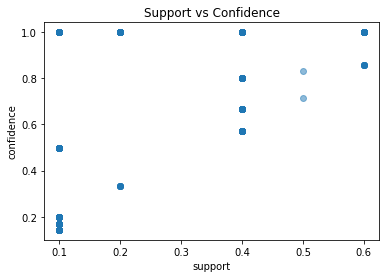

In [19]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

# Support vs Lift

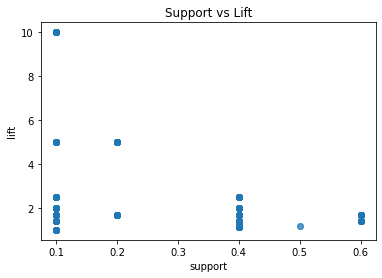

In [20]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()